In [2]:
import json
import sys
import numpy as np
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
from ast import literal_eval
#import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/chris/Desktop/sculpting/'

In [41]:
df = pd.read_csv('logLs.csv')
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(literal_eval) # convert back from string to list of floats
df.max_logLs = df.max_logLs.apply(literal_eval) # convert back from string to list of floats
df.min_logLs = df.min_logLs.apply(literal_eval) # convert back from string to list of floats
df.mean_logLs = df.mean_logLs.apply(literal_eval) # convert back from string to list of floats
df.median_logLs = df.median_logLs.apply(literal_eval) # convert back from string to list of floats
df.std_logLs = df.std_logLs.apply(literal_eval) # convert back from string to list of floats

df.max_logLs = df.max_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.min_logLs = df.min_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.mean_logLs = df.mean_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.median_logLs = df.median_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.std_logLs = df.std_logLs.apply(lambda y: np.nan if type(y)==list else y)
df.transit_multiplicities_all = df.transit_multiplicities_all.apply(lambda y: np.nan if len(y)==0 else y)

print(df.transit_multiplicities_all[0][0])
print(df)
print(max(df.max_logLs))

[1049, 94]
        ms   bs            cs   fs      max_logLs      min_logLs  \
0     -2.0  0.0  1.000000e+08  0.0 -175743.107503 -175743.107503   
1     -2.0  0.0  1.000000e+08  0.1  -83865.117639  -87558.177445   
2     -2.0  0.0  1.000000e+08  0.2  -70187.868187  -73861.127993   
3     -2.0  0.0  1.000000e+08  0.3  -62234.628931  -65888.088737   
4     -2.0  0.0  1.000000e+08  0.4  -56624.918736  -60258.578542   
...    ...  ...           ...  ...            ...            ...   
14636  0.0  1.0  1.000000e+10  0.6            NaN            NaN   
14637  0.0  1.0  1.000000e+10  0.7            NaN            NaN   
14638  0.0  1.0  1.000000e+10  0.8            NaN            NaN   
14639  0.0  1.0  1.000000e+10  0.9            NaN            NaN   
14640  0.0  1.0  1.000000e+10  1.0            NaN            NaN   

          mean_logLs   median_logLs    std_logLs  \
0     -175743.107503 -175743.107503     0.000000   
1      -85350.733210  -85037.099447  1248.755595   
2      -71665.93

In [4]:
# redo ms because I forgot that I rounded to single decimal beforehand
ms_corrected = []
ms_corrected_for_plotting = []
for gi_m in range(11):
    for gi_b in range(11):
        ms = -1e-9*np.logspace(8,10,11)[gi_m]
        ms_corrected.append(ms)
        ms_for_plotting = np.log10(np.logspace(8,10,11))[gi_m]
        ms_corrected_for_plotting.append(ms_for_plotting)
print(ms_corrected)
print(ms_corrected_for_plotting)

[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.1584893192461111, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.25118864315095824, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.3981071705534969, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944, -0.6309573444801944

In [11]:
df.cs.unique()

array([1.00000000e+08, 1.58489319e+08, 2.51188643e+08, 3.98107171e+08,
       6.30957344e+08, 1.00000000e+09, 1.58489319e+09, 2.51188643e+09,
       3.98107171e+09, 6.30957344e+09, 1.00000000e+10])

In [46]:
df_billion = df.loc[(df.cs > 1e8) & (df.cs < 2e8)]
point_two = df_billion.loc[df.fs == 0.2]
#print(point_two)

bs = point_two.bs
logLs = point_two.mean_logLs
print(logLs)

13      -73971.566512
134     -70918.856919
255     -71276.362566
376     -71085.290272
497     -70896.686375
             ...     
14049             NaN
14170             NaN
14291             NaN
14412             NaN
14533             NaN
Name: mean_logLs, Length: 121, dtype: float64


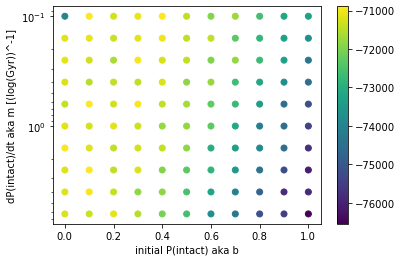

In [47]:
plt.scatter(bs, [-1*m for m in ms_corrected], c=logLs) # mean_logLs2 for mean instead of peak location of KDE
plt.xlabel('initial P(intact) aka b')
plt.ylabel('dP(intact)/dt aka m [(log(Gyr))^-1]')
plt.gca().invert_yaxis()
#plt.yscale('symlog', linthreshy=10)
plt.yscale('log')
plt.colorbar()
plt.show()